# t-SNE 範例
* 觀察S曲線使用 t-SNE 不同 perplexity 的流形還原效果

In [23]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
import time

In [34]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
perplexities = np.arange(30, 300, 30)

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

S - Curve with perplexity = 30 in 1.48 sec
S - Curve with perplexity = 60 in 1.51 sec
S - Curve with perplexity = 90 in 2.31 sec
S - Curve with perplexity = 120 in 2.08 sec
S - Curve with perplexity = 150 in 2.04 sec
S - Curve with perplexity = 180 in 2.06 sec
S - Curve with perplexity = 210 in 2.29 sec
S - Curve with perplexity = 240 in 1.85 sec
S - Curve with perplexity = 270 in 1.65 sec


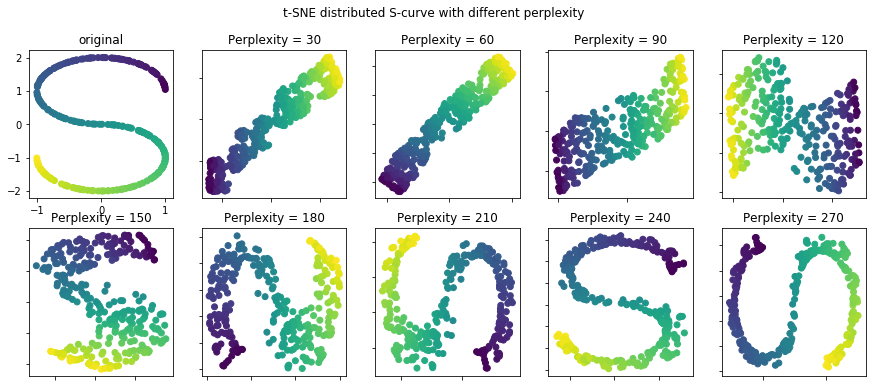

In [36]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
ax0 = axes.ravel()[0]
ax0.scatter(X[:, 0], X[:, 2], c=color)
ax0.set_title('original')

# 繪製不同 perplexity 下的 t-SNE 分群圖 (請注意! 語法也要對應調整)
axes = axes.ravel()[1:]
for ax, perp in zip(axes, perplexities):
    t0 = time.time()
    tsne = manifold.TSNE(n_components=n_components, init='pca',
                         random_state=0, perplexity=perp)
    X_tsne = tsne.fit_transform(X)
    t1 = time.time()
    
    print(f'S - Curve with perplexity = {perp} in {(t1-t0):.3g} sec')
    
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.set_title(f'Perplexity = {perp}')
    ax.axis('tight')
    
plt.suptitle('t-SNE distributed S-curve with different perplexity')
plt.show()

In [44]:
# take narrower perplexity range
perplexity = np.arange(225, 255, 3)

S - Curve with perplexity = 225 in 2.17 sec
S - Curve with perplexity = 228 in 2.13 sec
S - Curve with perplexity = 231 in 2.26 sec
S - Curve with perplexity = 234 in 1.64 sec
S - Curve with perplexity = 237 in 1.65 sec
S - Curve with perplexity = 240 in 1.72 sec
S - Curve with perplexity = 243 in 1.56 sec
S - Curve with perplexity = 246 in 1.62 sec
S - Curve with perplexity = 249 in 2.12 sec
S - Curve with perplexity = 252 in 1.62 sec


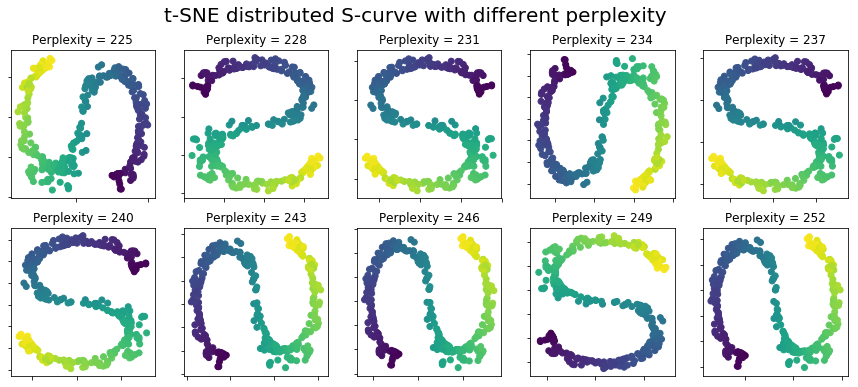

In [48]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for ax, perp in zip(axes.ravel(), perplexity):
    t0 = time.time()
    tsne = manifold.TSNE(n_components=n_components, init='pca',
                         random_state=0, perplexity=perp)
    X_tsne = tsne.fit_transform(X)
    t1 = time.time()
    
    print(f'S - Curve with perplexity = {perp} in {(t1-t0):.3g} sec')
    
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.set_title(f'Perplexity = {perp}')
    ax.axis('tight')
    
plt.suptitle('t-SNE distributed S-curve with different perplexity', fontsize=20)
plt.show()